In [16]:
import os
import pandas as pd
from nilearn.plotting import view_img

# print more rows
pd.set_option('display.max_rows', 500)

In [17]:
atlas = '/Users/alexandresayal/GitHub/phd-main-exp/data/brainnetome/BN_Atlas_246_1mm.nii.gz'
atlas_labels = '/Users/alexandresayal/GitHub/phd-main-exp/data/brainnetome/BN_Atlas_Labels.txt'

In [18]:
atlas_labels

'/Users/alexandresayal/GitHub/phd-main-exp/data/brainnetome/BN_Atlas_Labels.txt'

In [19]:
# read atlas labels to a dataframe - it is a tsv file
df = pd.read_csv(atlas_labels, sep='\t')
df

Lobe                                      Gyrus  \
0         Frontal Lobe               SFG, Superior Frontal Gyrus     
1         Frontal Lobe               SFG, Superior Frontal Gyrus     
2         Frontal Lobe               SFG, Superior Frontal Gyrus     
3         Frontal Lobe               SFG, Superior Frontal Gyrus     
4         Frontal Lobe               SFG, Superior Frontal Gyrus     
5         Frontal Lobe               SFG, Superior Frontal Gyrus     
6         Frontal Lobe               SFG, Superior Frontal Gyrus     
7         Frontal Lobe                  MFG, Middle Frontal Gyrus    
8         Frontal Lobe                  MFG, Middle Frontal Gyrus    
9         Frontal Lobe                  MFG, Middle Frontal Gyrus    
10        Frontal Lobe                  MFG, Middle Frontal Gyrus    
11        Frontal Lobe                  MFG, Middle Frontal Gyrus    
12        Frontal Lobe                  MFG, Middle Frontal Gyrus    
13        Frontal Lobe                  MFG, Middle Frontal Gyrus    
14        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
15        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
16        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
17        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
18        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
19        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
20        Frontal Lobe                          OrG, Orbital Gyrus   
21        Frontal Lobe                          OrG, Orbital Gyrus   
22        Frontal Lobe                          OrG, Orbital Gyrus   
23        Frontal Lobe                          OrG, Orbital Gyrus   
24        Frontal Lobe                          OrG, Orbital Gyrus   
25        Frontal Lobe                          OrG, Orbital Gyrus   
26        Frontal Lobe                       PrG, Precentral Gyrus   
27        Frontal Lobe                       PrG, Precentral Gyrus   
28        Frontal Lobe                       PrG, Precentral Gyrus   
29        Frontal Lobe                       PrG, Precentral Gyrus   
30        Frontal Lobe                       PrG, Precentral Gyrus   
31        Frontal Lobe                       PrG, Precentral Gyrus   
32        Frontal Lobe                     PCL, Paracentral Lobule   
33        Frontal Lobe                     PCL, Paracentral Lobule   
34        Temporal Lobe               STG, Superior Temporal Gyrus   
35        Temporal Lobe               STG, Superior Temporal Gyrus   
36        Temporal Lobe               STG, Superior Temporal Gyrus   
37        Temporal Lobe               STG, Superior Temporal Gyrus   
38        Temporal Lobe               STG, Superior Temporal Gyrus   
39        Temporal Lobe               STG, Superior Temporal Gyrus   
40        Temporal Lobe                 MTG, Middle Temporal Gyrus   
41        Temporal Lobe                 MTG, Middle Temporal Gyrus   
42        Temporal Lobe                 MTG, Middle Temporal Gyrus   
43        Temporal Lobe                 MTG, Middle Temporal Gyrus   
44        Temporal Lobe               ITG, Inferior Temporal Gyrus   
45        Temporal Lobe               ITG, Inferior Temporal Gyrus   
46        Temporal Lobe               ITG, Inferior Temporal Gyrus   
47        Temporal Lobe               ITG, Inferior Temporal Gyrus   
48        Temporal Lobe               ITG, Inferior Temporal Gyrus   
49        Temporal Lobe               ITG, Inferior Temporal Gyrus   
50        Temporal Lobe               ITG, Inferior Temporal Gyrus   
51        Temporal Lobe                        FuG, Fusiform Gyrus   
52        Temporal Lobe                        FuG, Fusiform Gyrus   
53        Temporal Lobe                        FuG, Fusiform Gyrus   
54        Temporal Lobe                 PhG, Parahippocampal Gyrus   
55        Temporal Lobe                 PhG, Parahippocampal Gyrus   
56        Temporal Lobe      

In [20]:
# edit the 'Label' column to remove L or R from the label depending on the hemisphere
for i in range(len(df)):
    if df['Hemisphere'][i] == 'L':
        # replace 'L(R)' with 'L'
        df.loc[i,'Label'] = df['Label'][i].replace('L(R)', 'L')
    elif df['Hemisphere'][i] == 'R':
        # replace 'L(R)' with 'R'
        df.loc[i,'Label'] = df['Label'][i].replace('L(R)', 'R')

In [21]:
df

Lobe                                      Gyrus  \
0         Frontal Lobe               SFG, Superior Frontal Gyrus     
1         Frontal Lobe               SFG, Superior Frontal Gyrus     
2         Frontal Lobe               SFG, Superior Frontal Gyrus     
3         Frontal Lobe               SFG, Superior Frontal Gyrus     
4         Frontal Lobe               SFG, Superior Frontal Gyrus     
5         Frontal Lobe               SFG, Superior Frontal Gyrus     
6         Frontal Lobe               SFG, Superior Frontal Gyrus     
7         Frontal Lobe                  MFG, Middle Frontal Gyrus    
8         Frontal Lobe                  MFG, Middle Frontal Gyrus    
9         Frontal Lobe                  MFG, Middle Frontal Gyrus    
10        Frontal Lobe                  MFG, Middle Frontal Gyrus    
11        Frontal Lobe                  MFG, Middle Frontal Gyrus    
12        Frontal Lobe                  MFG, Middle Frontal Gyrus    
13        Frontal Lobe                  MFG, Middle Frontal Gyrus    
14        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
15        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
16        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
17        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
18        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
19        Frontal Lobe                 IFG, Inferior Frontal Gyrus   
20        Frontal Lobe                          OrG, Orbital Gyrus   
21        Frontal Lobe                          OrG, Orbital Gyrus   
22        Frontal Lobe                          OrG, Orbital Gyrus   
23        Frontal Lobe                          OrG, Orbital Gyrus   
24        Frontal Lobe                          OrG, Orbital Gyrus   
25        Frontal Lobe                          OrG, Orbital Gyrus   
26        Frontal Lobe                       PrG, Precentral Gyrus   
27        Frontal Lobe                       PrG, Precentral Gyrus   
28        Frontal Lobe                       PrG, Precentral Gyrus   
29        Frontal Lobe                       PrG, Precentral Gyrus   
30        Frontal Lobe                       PrG, Precentral Gyrus   
31        Frontal Lobe                       PrG, Precentral Gyrus   
32        Frontal Lobe                     PCL, Paracentral Lobule   
33        Frontal Lobe                     PCL, Paracentral Lobule   
34        Temporal Lobe               STG, Superior Temporal Gyrus   
35        Temporal Lobe               STG, Superior Temporal Gyrus   
36        Temporal Lobe               STG, Superior Temporal Gyrus   
37        Temporal Lobe               STG, Superior Temporal Gyrus   
38        Temporal Lobe               STG, Superior Temporal Gyrus   
39        Temporal Lobe               STG, Superior Temporal Gyrus   
40        Temporal Lobe                 MTG, Middle Temporal Gyrus   
41        Temporal Lobe                 MTG, Middle Temporal Gyrus   
42        Temporal Lobe                 MTG, Middle Temporal Gyrus   
43        Temporal Lobe                 MTG, Middle Temporal Gyrus   
44        Temporal Lobe               ITG, Inferior Temporal Gyrus   
45        Temporal Lobe               ITG, Inferior Temporal Gyrus   
46        Temporal Lobe               ITG, Inferior Temporal Gyrus   
47        Temporal Lobe               ITG, Inferior Temporal Gyrus   
48        Temporal Lobe               ITG, Inferior Temporal Gyrus   
49        Temporal Lobe               ITG, Inferior Temporal Gyrus   
50        Temporal Lobe               ITG, Inferior Temporal Gyrus   
51        Temporal Lobe                        FuG, Fusiform Gyrus   
52        Temporal Lobe                        FuG, Fusiform Gyrus   
53        Temporal Lobe                        FuG, Fusiform Gyrus   
54        Temporal Lobe                 PhG, Parahippocampal Gyrus   
55        Temporal Lobe                 PhG, Parahippocampal Gyrus   
56        Temporal Lobe      

In [23]:
# export df as tsv
df.to_csv('BN_Atlas_Labels_cleaned.tsv', sep='\t', index=False)

In [23]:
# get df['Label'] as a list
labels = df['Label'].tolist()

/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



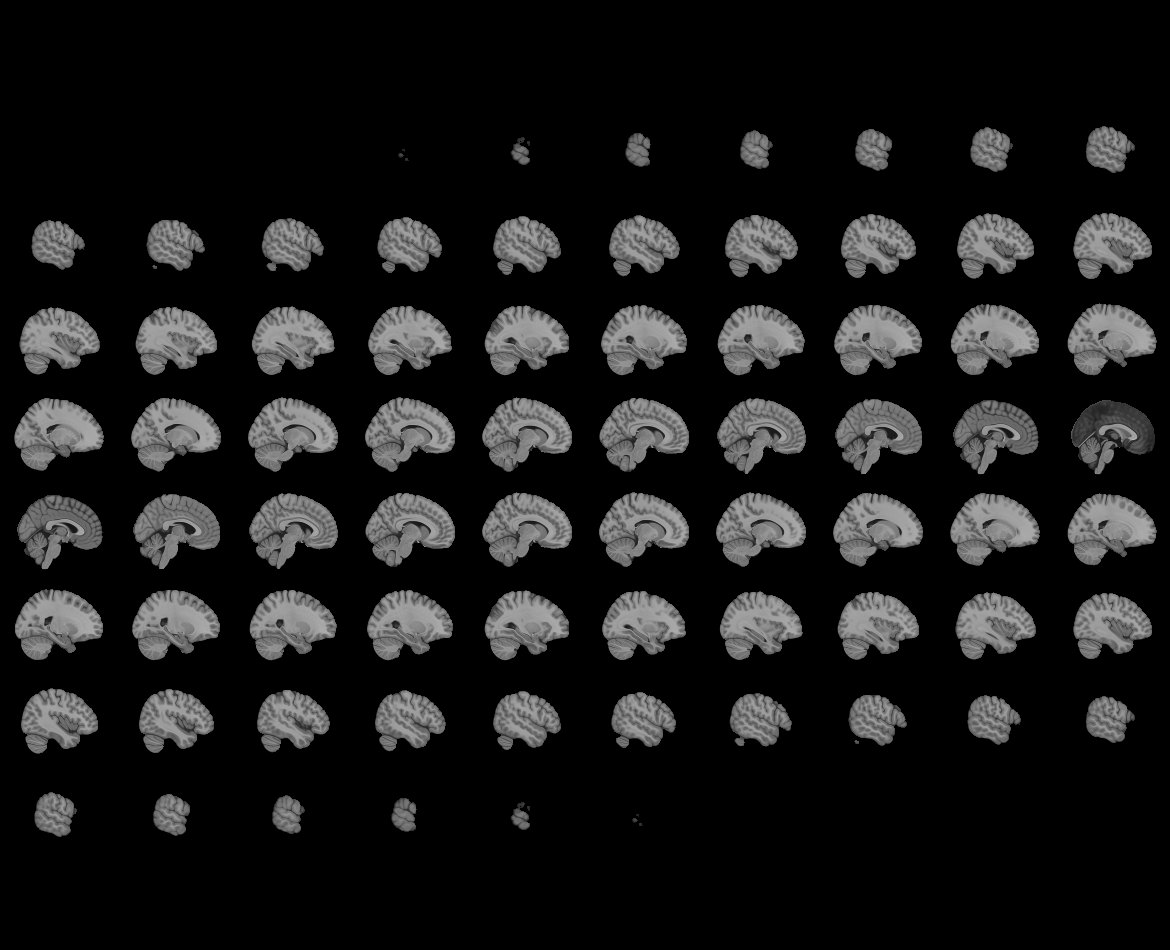
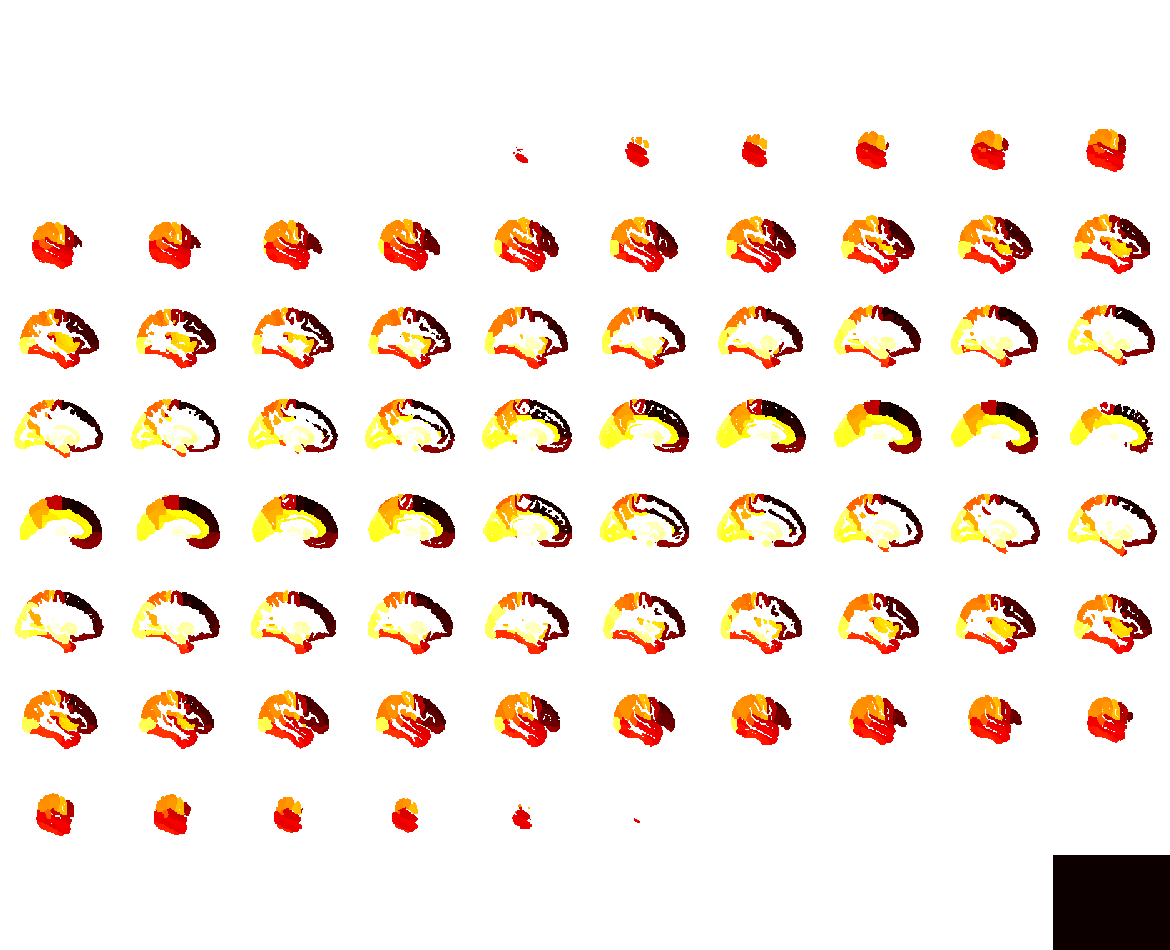

In [6]:
# show atlas
view_img(atlas, title='Brainnetome Atlas')

/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



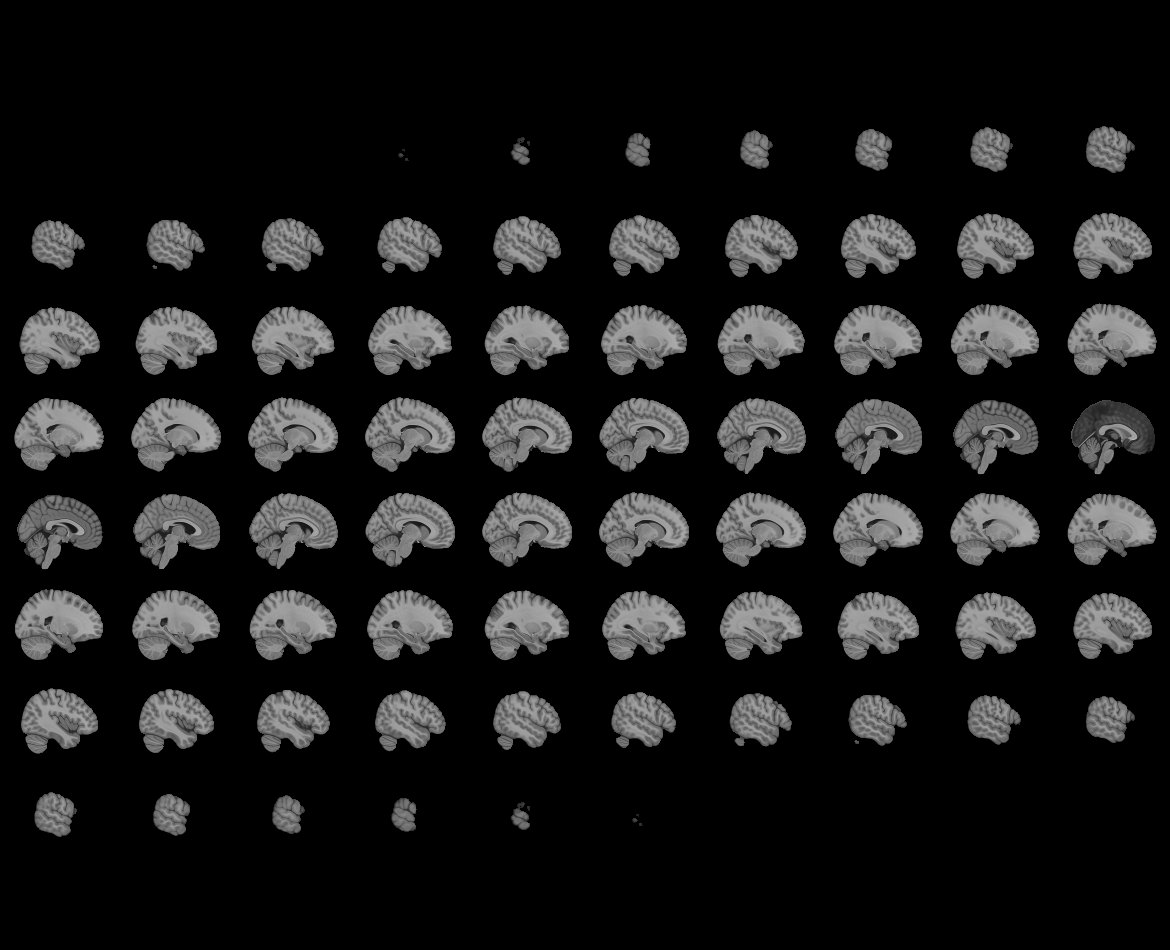
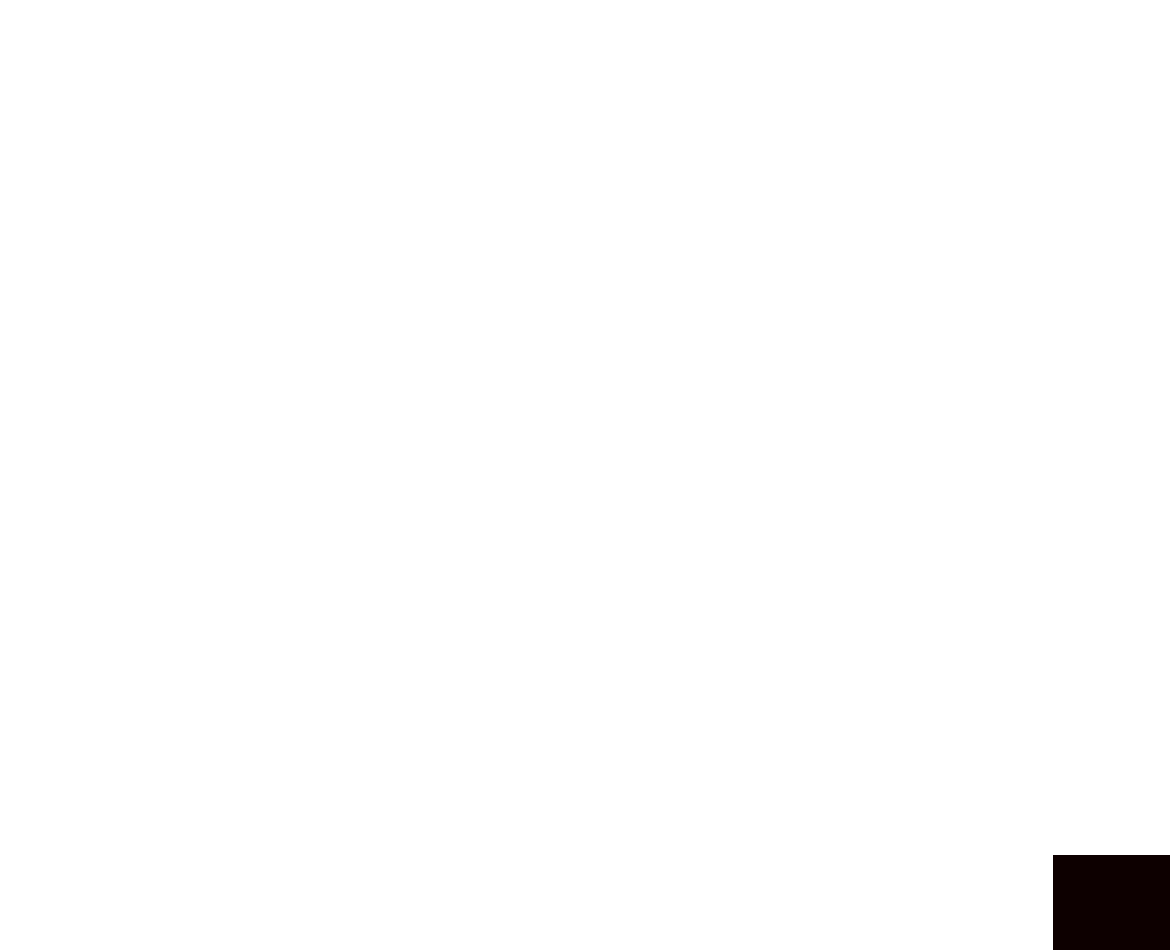

In [11]:
# get label_id for A4ul_l and A4ul_r
labels_pmc = df[df['Description_Short'] == 'A4ul']['Label_ID'].tolist()
labels_pmc

from nilearn.image import math_img
from nilearn.plotting import view_img
pmc_mask_l = math_img(f'(img == {labels_pmc[0]})', img=atlas)
pmc_mask_r = math_img(f'(img == {labels_pmc[1]})', img=atlas)

# join
pmc_mask = math_img('(img_l + img_r)', img_l=pmc_mask_l, img_r=pmc_mask_r)

view_img(pmc_mask)

In [12]:
#save mask to file
pmc_mask.to_filename('pmc_brainnetome_mask.nii.gz')

[211, 213, 212, 214]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



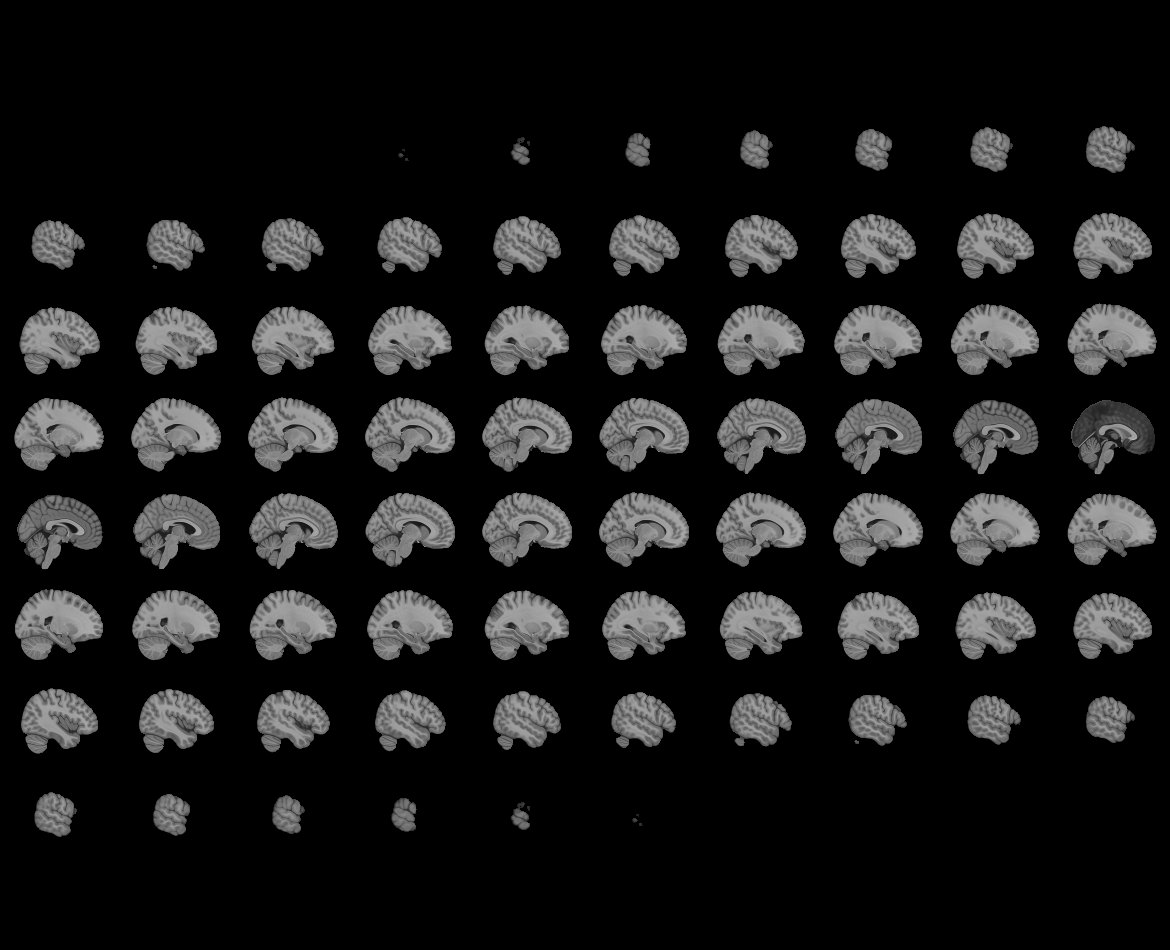
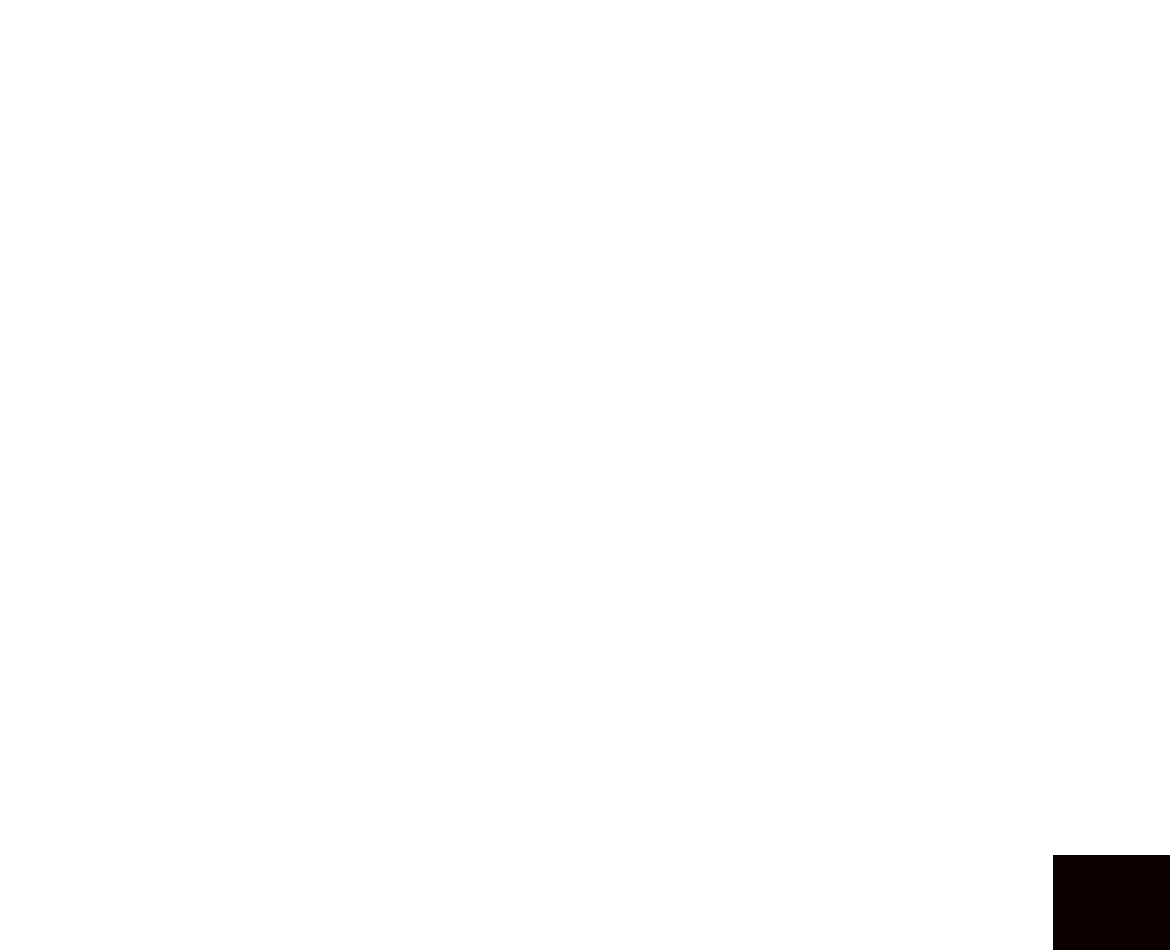

In [10]:
# get label_id for all that contain 'Amyg
labels_amg = df[df['Description_Short'].str.contains('Amyg')]['Label_ID'].tolist()
print(labels_amg)

from nilearn.image import math_img
from nilearn.plotting import view_img

# create a mask for each label and combine them
amg_mask = None
for label in labels_amg:
	if amg_mask is None:
		amg_mask = math_img(f'img == {label}', img=atlas)
	else:
		amg_mask = math_img('img1 + img2', img1=amg_mask, img2=math_img(f'img == {label}', img=atlas))

view_img(amg_mask)

[223, 224]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



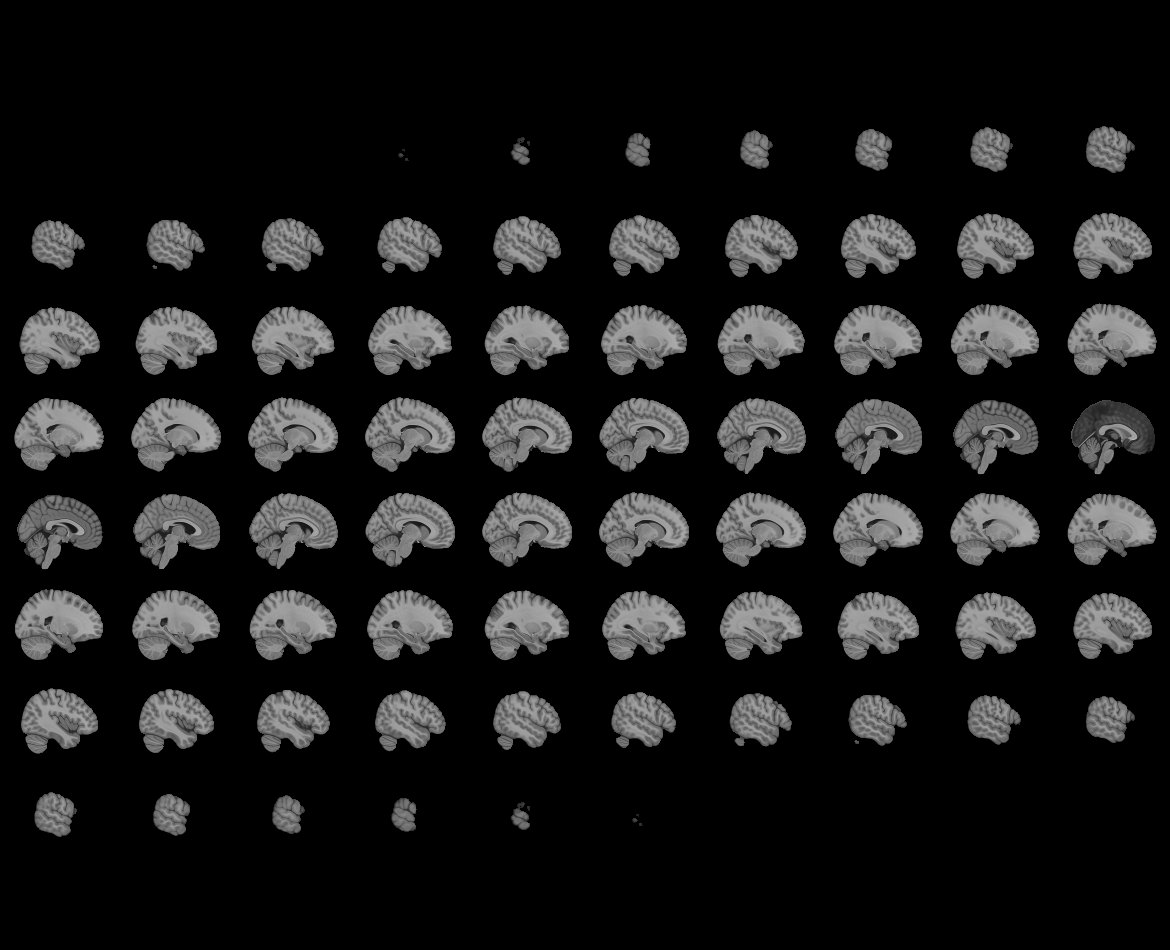
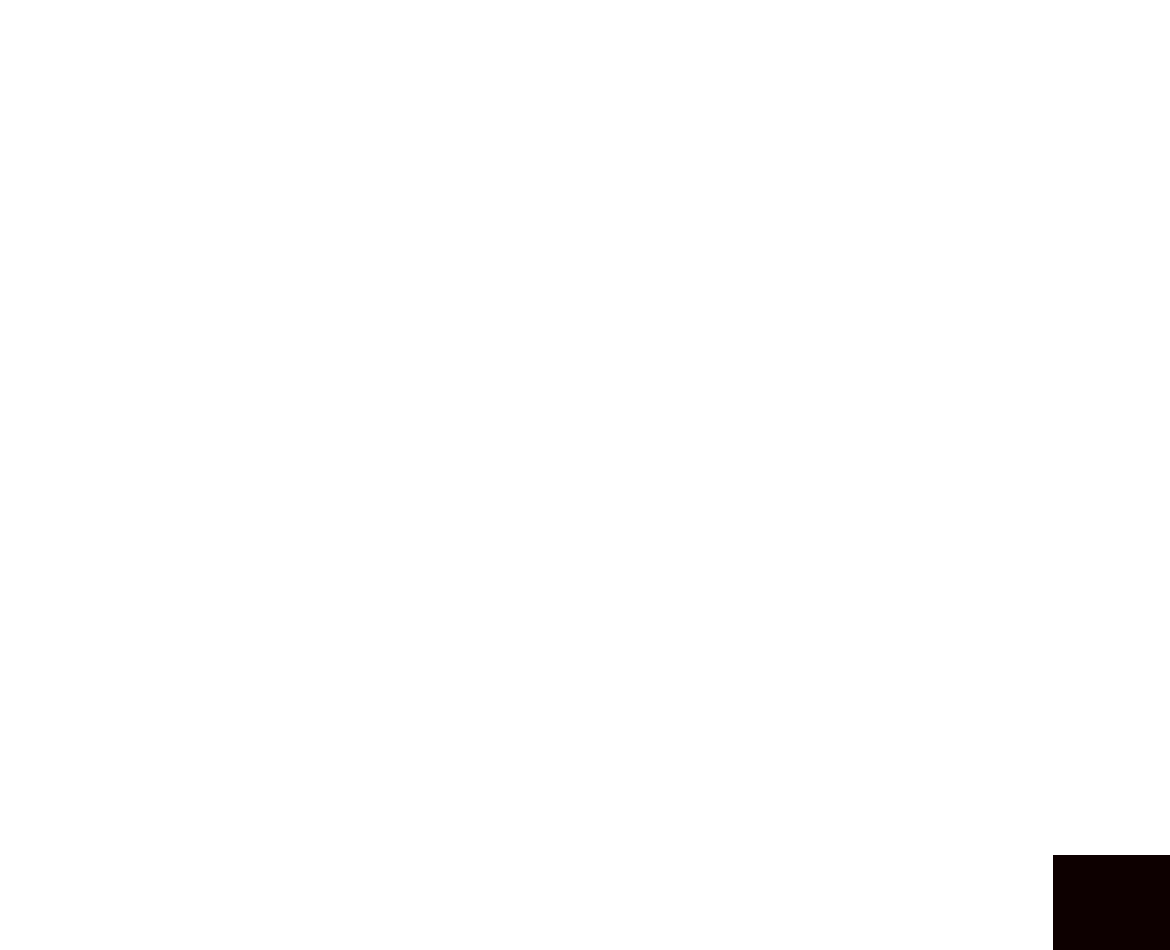

In [14]:
# get label_id for all that contain NAC
labels_nac = df[df['Description_Short'].str.contains('NAC')]['Label_ID'].tolist()
print(labels_nac)

from nilearn.image import math_img
from nilearn.plotting import view_img

# create a mask for each label and combine them
nac_mask = None
for label in labels_nac:
	if nac_mask is None:
		nac_mask = math_img(f'img == {label}', img=atlas)
	else:
		nac_mask = math_img('img1 + img2', img1=nac_mask, img2=math_img(f'img == {label}', img=atlas))

view_img(nac_mask)

In [15]:
# save mask to file
nac_mask.to_filename('nac_brainnetome_mask.nii.gz')

# Chap

In [19]:
# get all Subcortical Nuclei rows
subcortical_nuclei = df[df['Lobe'] == 'Subcortical Nuclei']
subcortical_nuclei

Lobe              Gyrus          Label  Label_ID  \
105  Subcortical Nuclei     Amyg, Amygdala  Amyg_L(R)_2_1       211   
106  Subcortical Nuclei     Amyg, Amygdala  Amyg_L(R)_2_2       213   
107  Subcortical Nuclei  Hipp, Hippocampus  Hipp_L(R)_2_1       215   
108  Subcortical Nuclei  Hipp, Hippocampus  Hipp_L(R)_2_2       217   
109  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_1       219   
110  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_2       221   
111  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_3       223   
112  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_4       225   
113  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_5       227   
114  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_6       229   
115  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_1       231   
116  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_2       233   
117  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_3       235   
118  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_4       237   
119  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_5       239   
120  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_6       241   
121  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_7       243   
122  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_8       245   
228  Subcortical Nuclei     Amyg, Amygdala  Amyg_L(R)_2_1       212   
229  Subcortical Nuclei     Amyg, Amygdala  Amyg_L(R)_2_2       214   
230  Subcortical Nuclei  Hipp, Hippocampus  Hipp_L(R)_2_1       216   
231  Subcortical Nuclei  Hipp, Hippocampus  Hipp_L(R)_2_2       218   
232  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_1       220   
233  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_2       222   
234  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_3       224   
235  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_4       226   
236  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_5       228   
237  Subcortical Nuclei  BG, Basal Ganglia    BG_L(R)_6_6       230   
238  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_1       232   
239  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_2       234   
240  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_3       236   
241  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_4       238   
242  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_5       240   
243  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_6       242   
244  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_7       244   
245  Subcortical Nuclei      Tha, Thalamus   Tha_L(R)_8_8       246   

                              Description             MNI Hemisphere  \
105                mAmyg, medial amygdala   -19, -2, -20           L   
106               lAmyg, lateral amygdala   -27, -4, -20           L   
107            rHipp, rostral hippocampus  -22, -14, -19           L   
108             cHipp, caudal hippocampus  -28, -30, -10           L   
109                  vCa, ventral caudate     -12, 14, 0           L   
110                   GP, globus pallidus     -22, -2, 4           L   
111                NAC, nucleus accumbens     -17, 3, -9           L   
112            vmPu, ventromedial putamen     -23, 7, -4           L   
113                   dCa, dorsal caudate     -14, 2, 16           L   
114            dlPu, dorsolateral putamen     -28, -5, 2           L   
115   mPFtha, medial pre-frontal thalamus     -7, -12, 5           L   
116            mPMtha, pre-motor thalamus    -18, -13, 3           L   
117                Stha, sensory thalamus    -18, -23, 4           L   
118      rTtha, rostral temporal thalamus     -7, -14, 7           L   
119    PPtha, posterior parietal thalamus    -16, -24, 6           L   
120              Otha, occipital thalamus    -15, -28, 4           L   
121       cTtha, caudal temporal thalamus   -12, -22, 13           L   
122  lPFtha, lateral pre-frontal thalamus    -11, -14, 2           L   
228                mAmy

/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/image/resampling.py:803: UserWarning: Casting data from int32 to float32
  return resample_img(
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



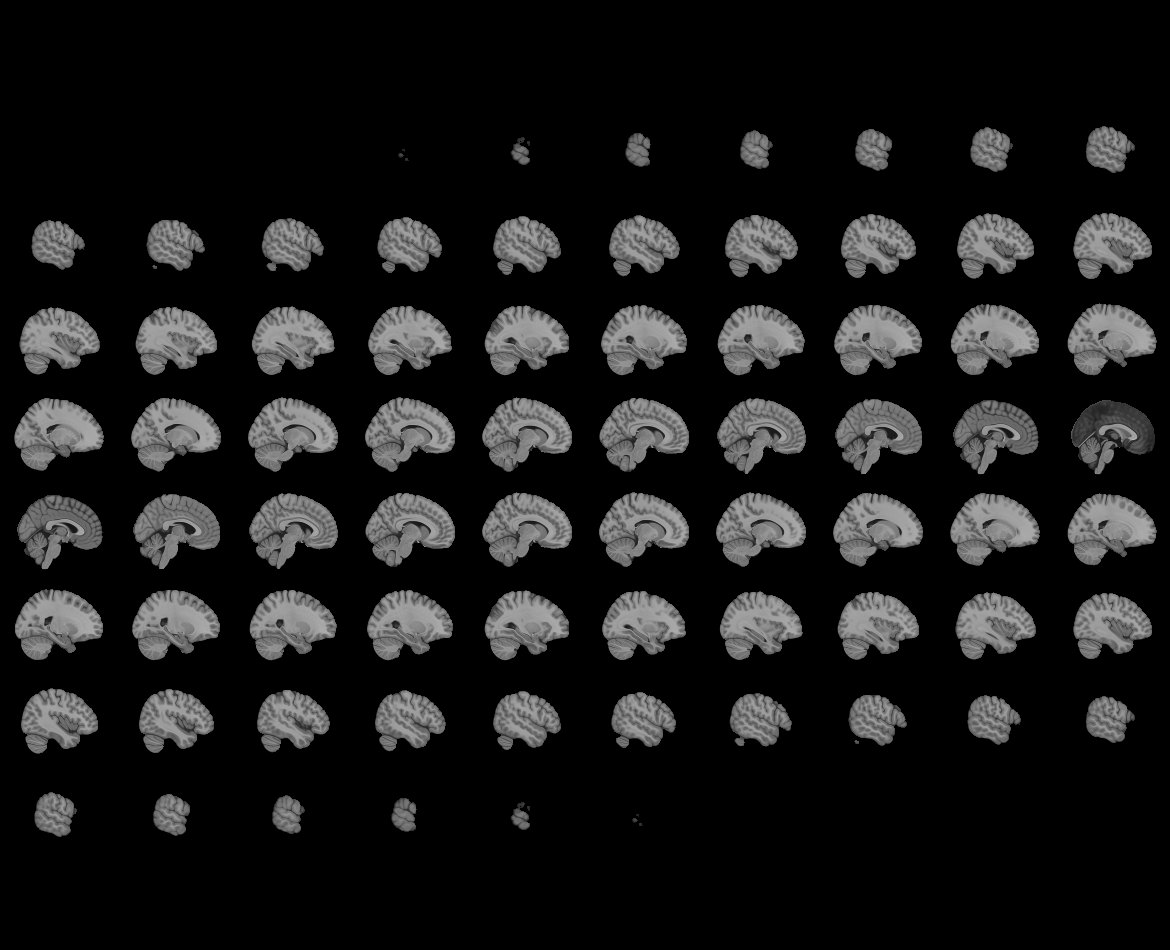
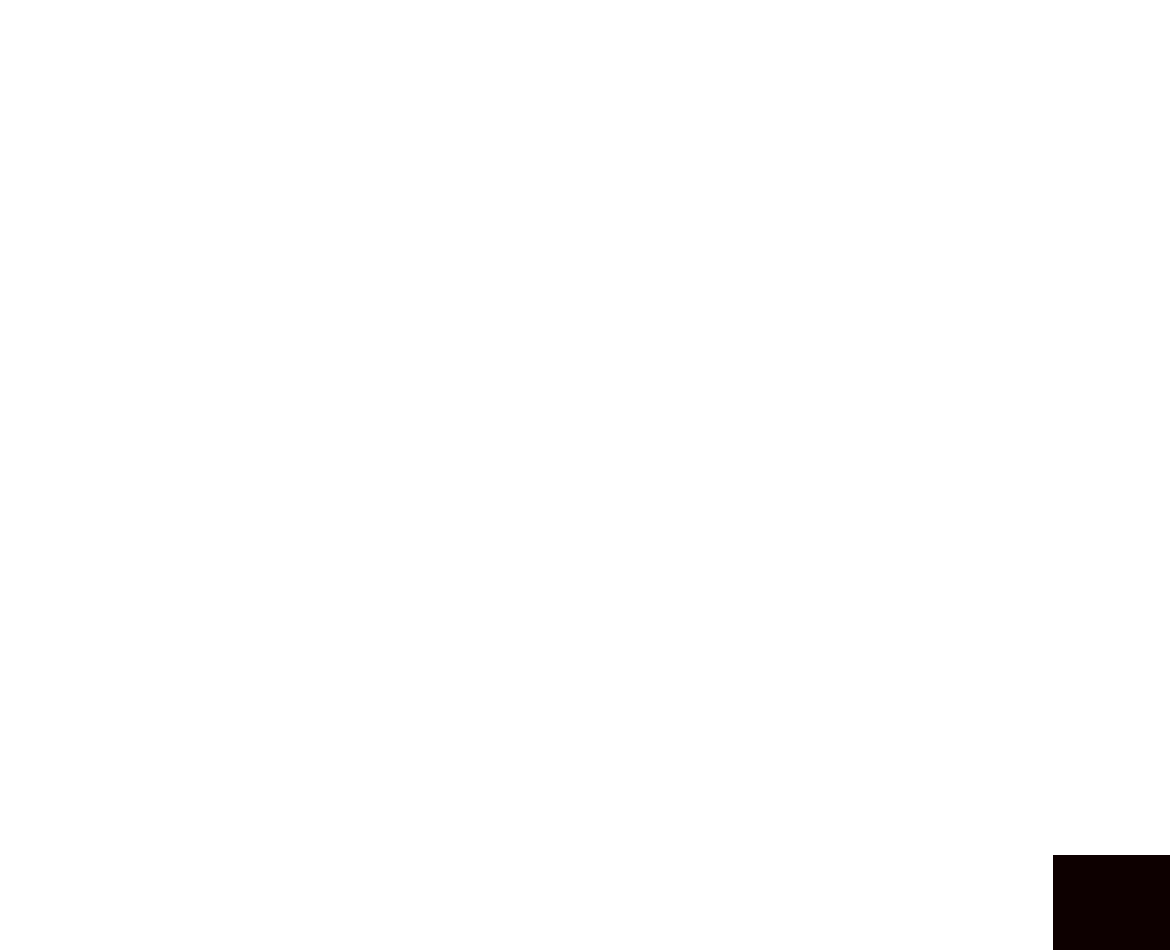

In [30]:
import numpy as np
from nilearn import image
import nibabel as nib

# Load the atlas NIfTI image
atlas_img = nib.load(atlas)

# Specify the intensity value of the desired ROI
roi_value = 246 

# Extract data from the atlas image
atlas_data = atlas_img.get_fdata()

# Create a binary mask for the specified ROI
roi_mask_data = np.where(atlas_data == roi_value, 1, 0)

# Create a new NIfTI image for the ROI mask
roi_mask_img = nib.Nifti1Image(roi_mask_data, atlas_img.affine, dtype='int64')

view_img(roi_mask_img)


In [46]:
# get unique values in atlas_img
unique_values = np.unique(atlas_data)
unique_values.shape

(247,)

In [31]:
# load sample activation map
map_path = '/Volumes/T7/BIDS-MUSICNF/derivatives/nilearn-glm/sub-01_task-nf_stat-z_con-MotorImageryMinusRest.nii.gz'

# get the values of the map inside the ROI
from nilearn.maskers import NiftiMasker

masker = NiftiMasker(mask_img=roi_mask_img, standardize=False)

roi_values = masker.fit_transform(map_path)

# Print the mean activation value within the ROI
print(f'Mean activation value within the ROI: {roi_values.mean()}')



[NiftiMasker.wrapped] Resampling images
Mean activation value within the ROI: 0.29520294440114486


/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/maskers/nifti_masker.py:113: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/image/image.py:351: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(img, cropped_data, new_affine, copy_header=copy_header)


In [25]:
# add 'background' to the labels list at the beginning
labels.insert(0, 'background')

In [65]:
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas, labels=labels, standardize=False, background_label=0, resampling_target='data', interpolation='nearest')

roi_values = masker.fit_transform(map_path)
roi_values.shape

roi_values[0,245]

np.float64(0.210144429139488)

In [55]:
masker.generate_report()

/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/image/resampling.py:716: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=orde


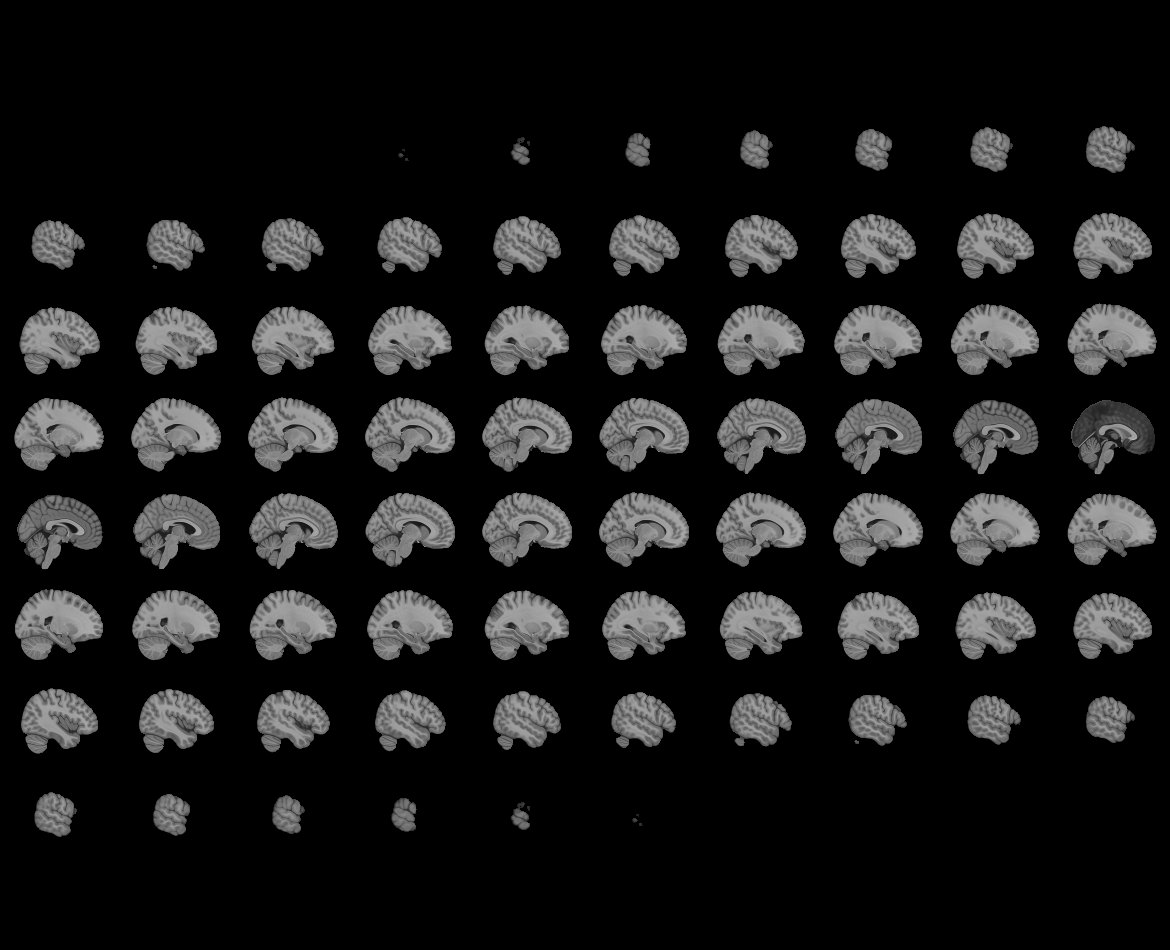
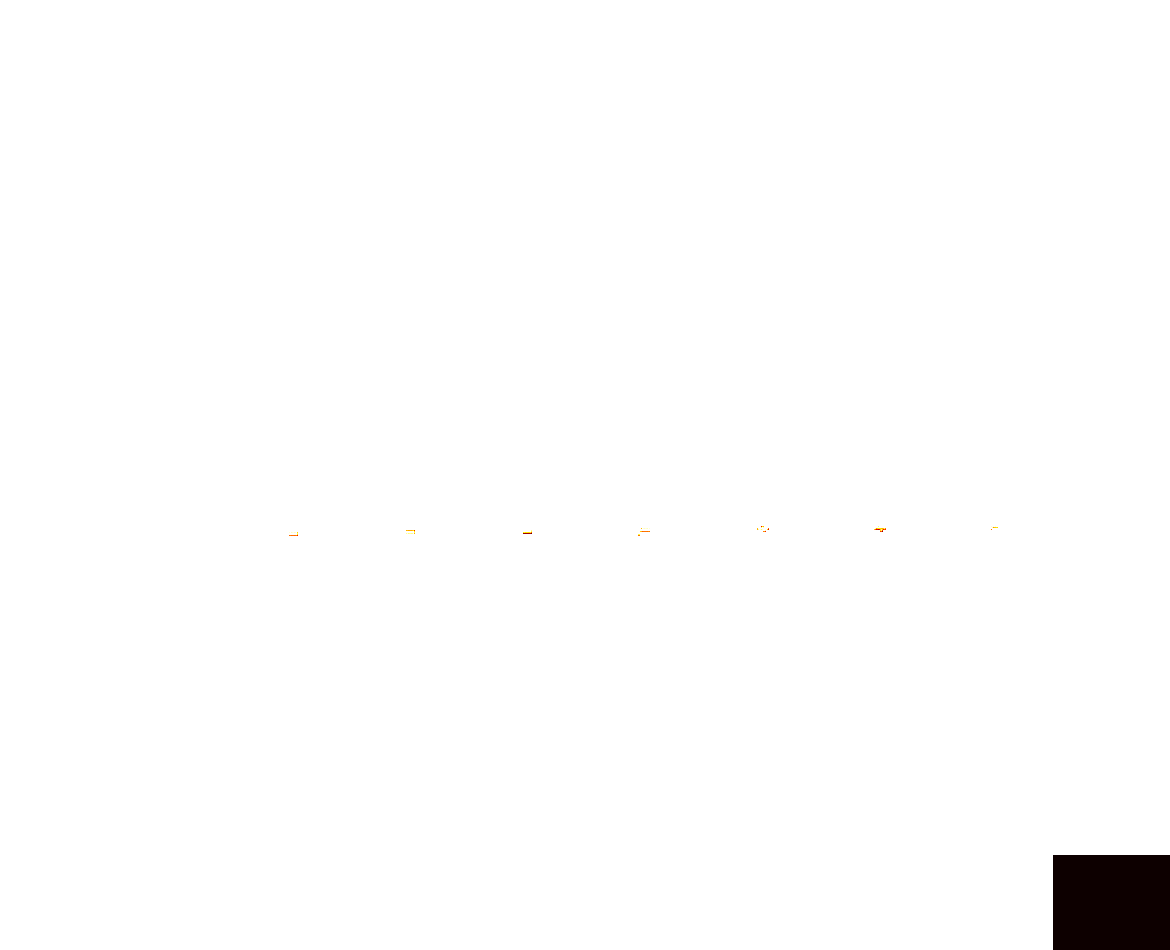

In [63]:
# resample the atlas to the map using resample_img
from nilearn.image import resample_img

out = resample_img(roi_mask_img, target_affine=nib.load(map_path).affine, target_shape=nib.load(map_path).shape, interpolation='nearest')

view_img(out)

/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/phd-main-exp/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



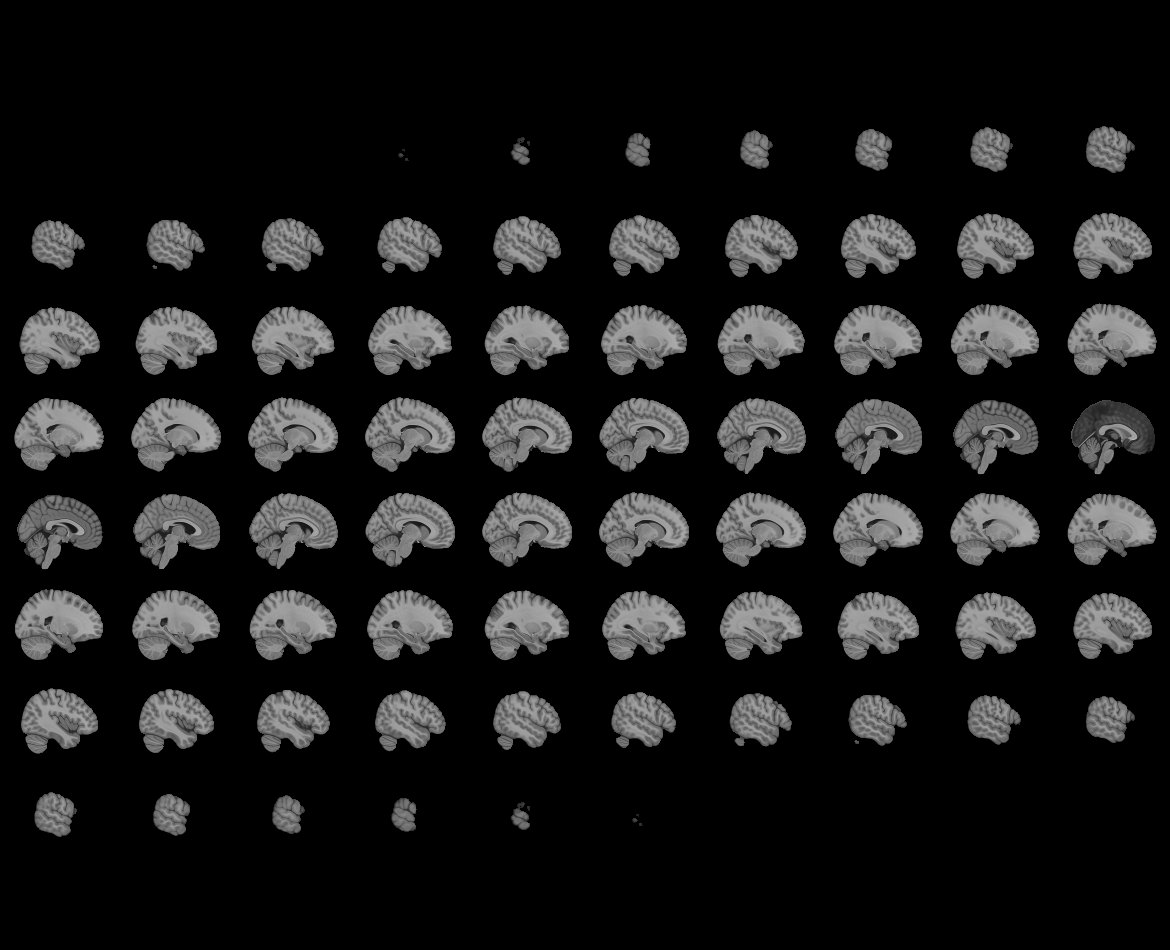
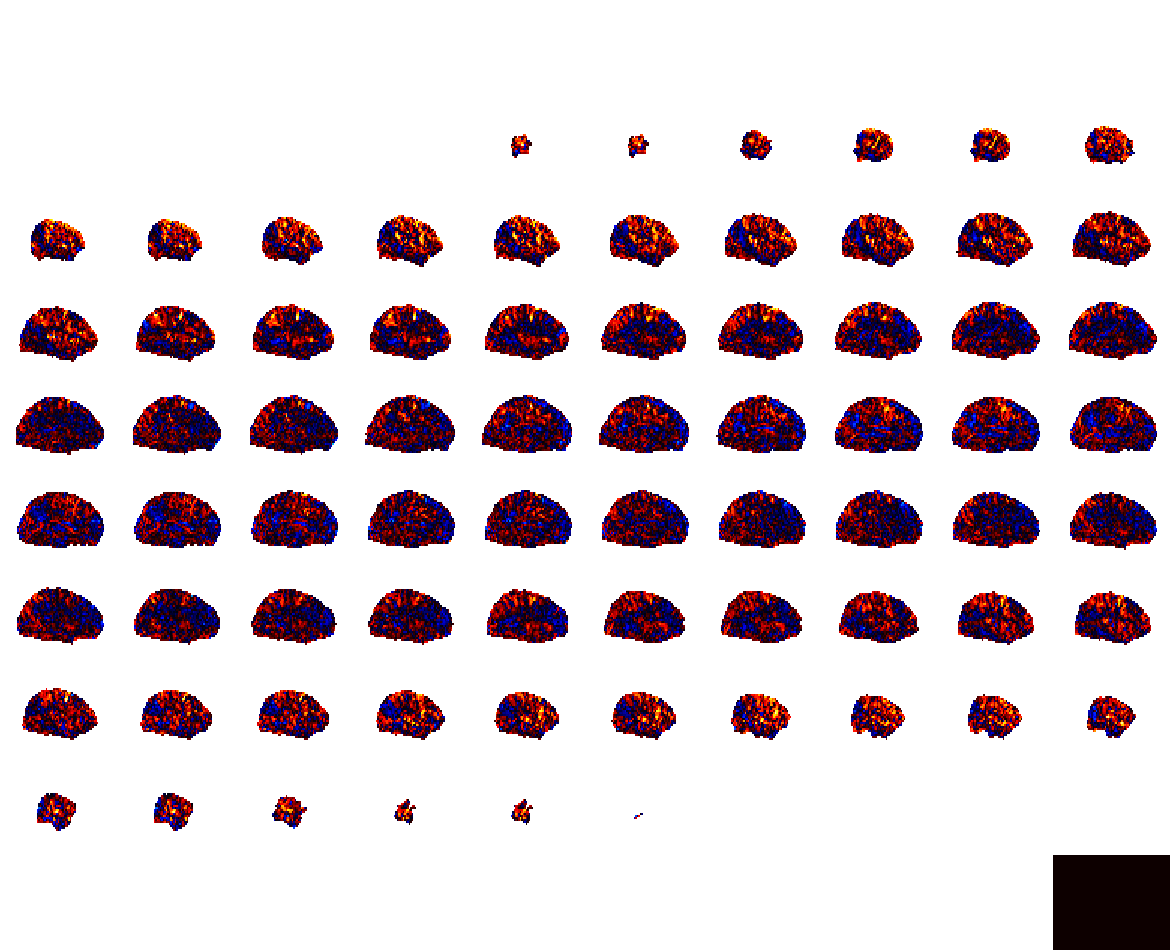

In [62]:
out = resample_img(map_path, target_affine=nib.load(atlas).affine, target_shape=nib.load(atlas).shape, interpolation='nearest')

view_img(out)

In [21]:
import os
out_dir_group = os.path.join('/Volumes/T7/BIDS-MUSICNF',"derivatives","nilearn-glm-group")
contrasts_renamed = ['MotorImageryMinusRest']

z_map_g_active_1 = os.path.join(out_dir_group,
                       f'group_task-nf_run-1_stat-z_con-{contrasts_renamed[0]}.nii.gz')

z_map_g_active_2 = os.path.join(out_dir_group,
                       f'group_task-nf_run-2_stat-z_con-{contrasts_renamed[0]}.nii.gz')

z_map_g_sham_1 = os.path.join(out_dir_group,
                       f'group_task-sham_run-1_stat-z_con-{contrasts_renamed[0]}.nii.gz')

z_map_g_sham_2 = os.path.join(out_dir_group,
                       f'group_task-sham_run-2_stat-z_con-{contrasts_renamed[0]}.nii.gz')

# threshold both maps
from nilearn.glm import threshold_stats_img

alpha = 0.05
hc = 'fdr'
ct = 15

z_map_g_active_1_thr, thres_active_1 = threshold_stats_img(z_map_g_active_1, alpha=alpha, height_control=hc, cluster_threshold=ct)
z_map_g_active_2_thr, thres_active_2 = threshold_stats_img(z_map_g_active_2, alpha=alpha, height_control=hc, cluster_threshold=ct)
z_map_g_sham_1_thr, thres_sham_1 = threshold_stats_img(z_map_g_sham_1, alpha=alpha, height_control=hc, cluster_threshold=ct)
z_map_g_sham_2_thr, thres_sham_2 = threshold_stats_img(z_map_g_sham_2, alpha=alpha, height_control=hc, cluster_threshold=ct)

In [27]:
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas, labels=labels, standardize=False, background_label=0, resampling_target='data', interpolation='nearest')

roi_values_active_1 = masker.fit_transform(z_map_g_active_1_thr)
roi_values_active_2 = masker.fit_transform(z_map_g_active_2_thr)
roi_values_sham_1 = masker.fit_transform(z_map_g_sham_1_thr)
roi_values_sham_2 = masker.fit_transform(z_map_g_sham_2_thr)




In [36]:
# indexes of rois of interest [211:246]
import numpy as np
r_int = np.arange(211-1, 246)
r_int

array([210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245])

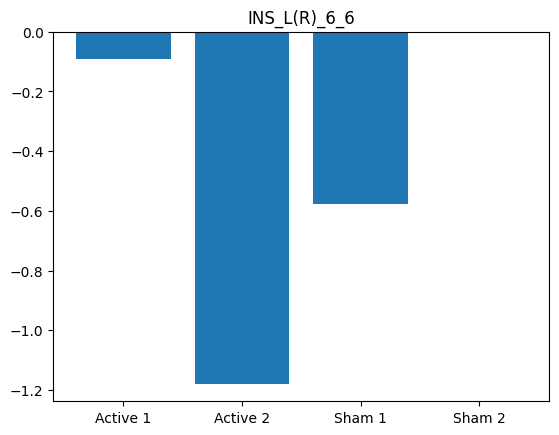

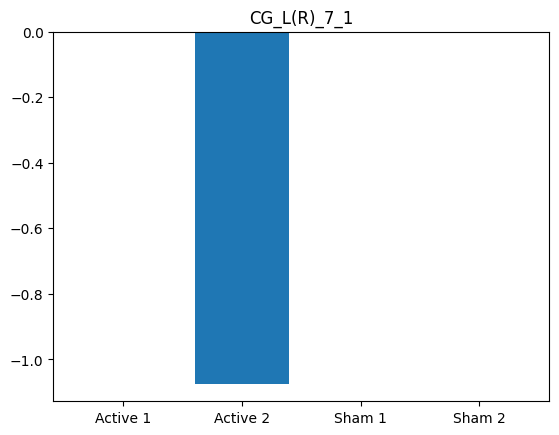

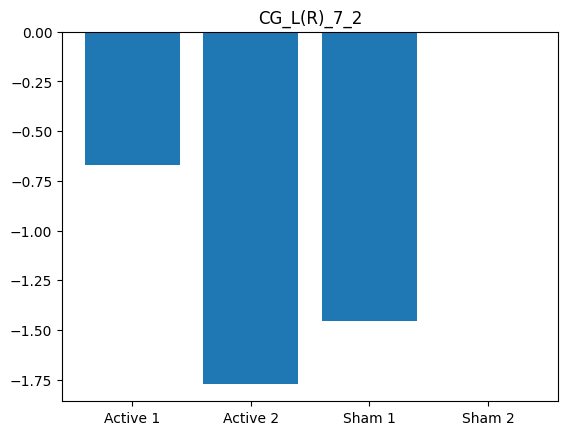

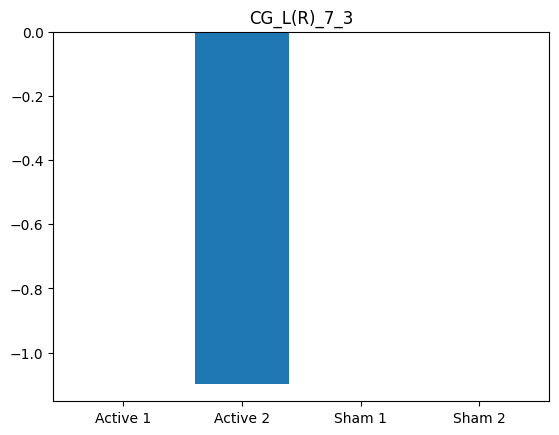

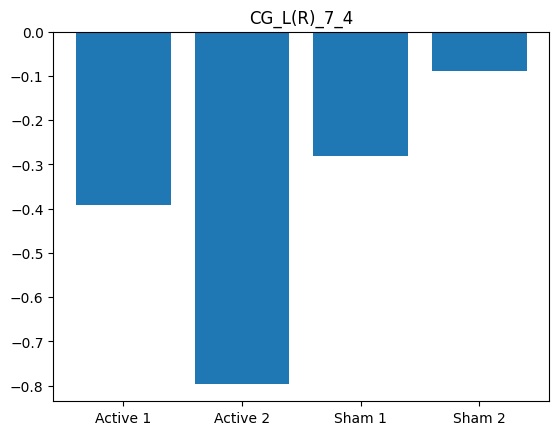

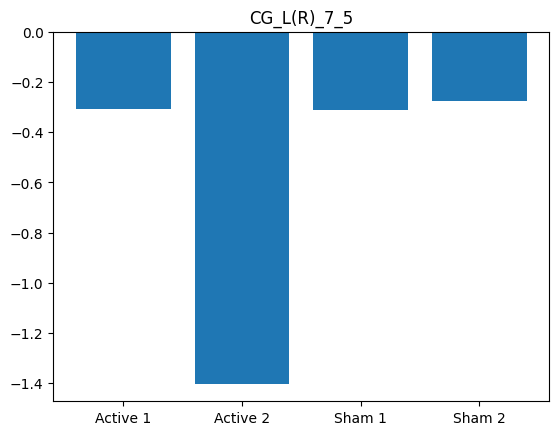

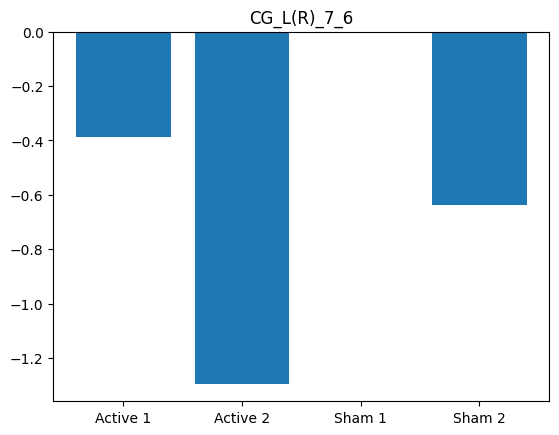

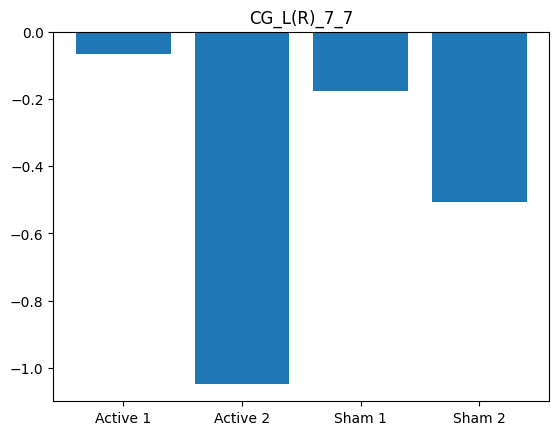

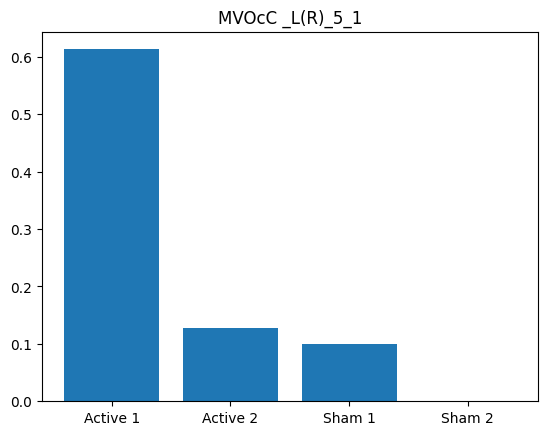

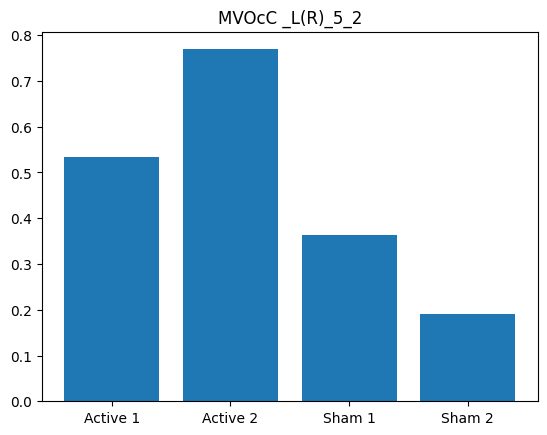

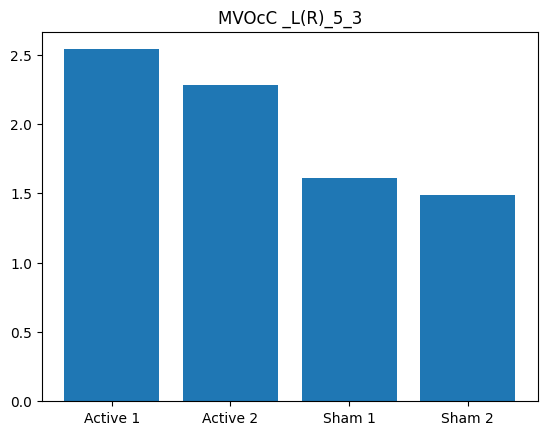

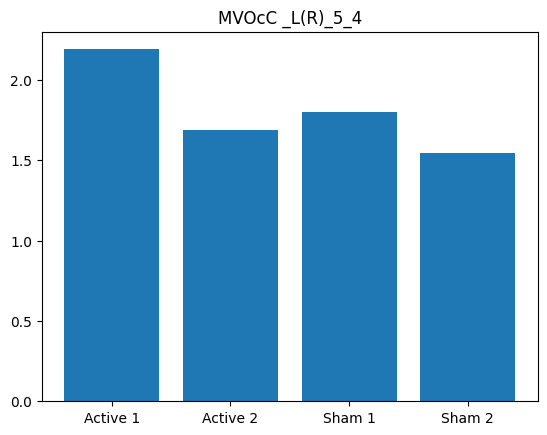

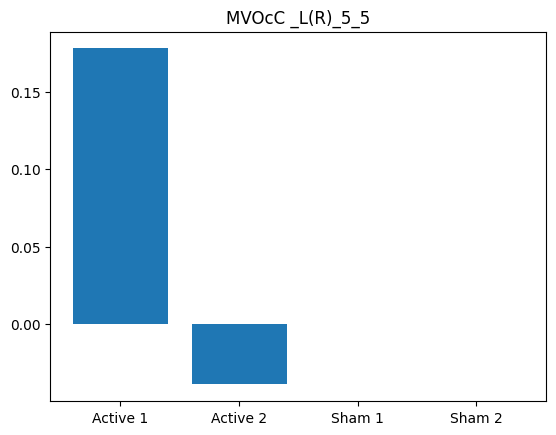

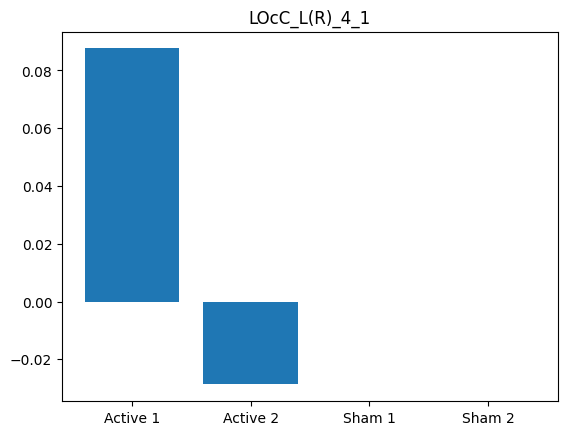

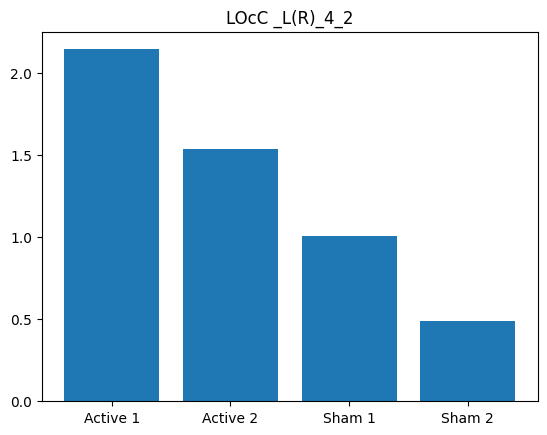

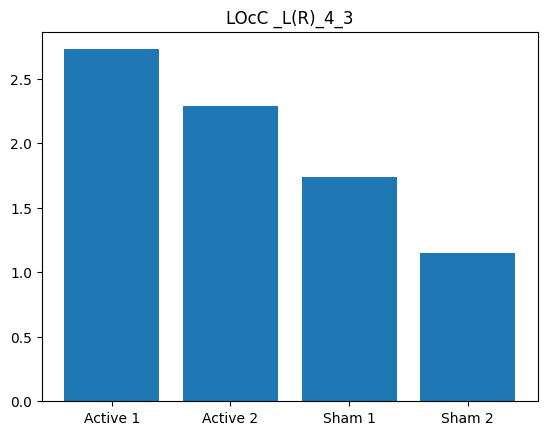

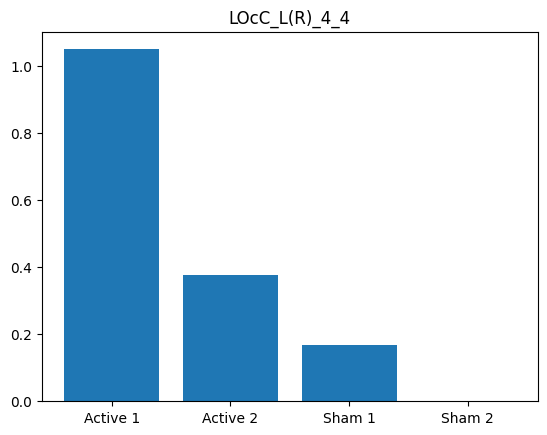

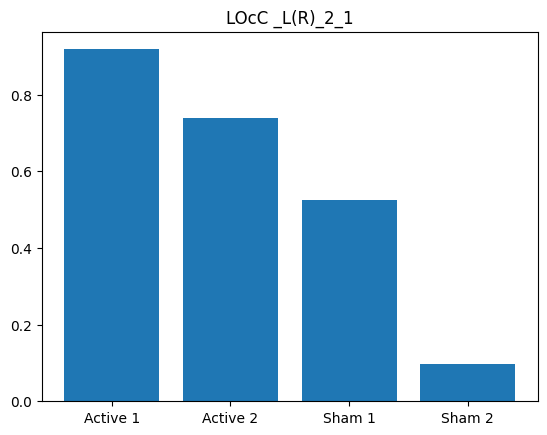

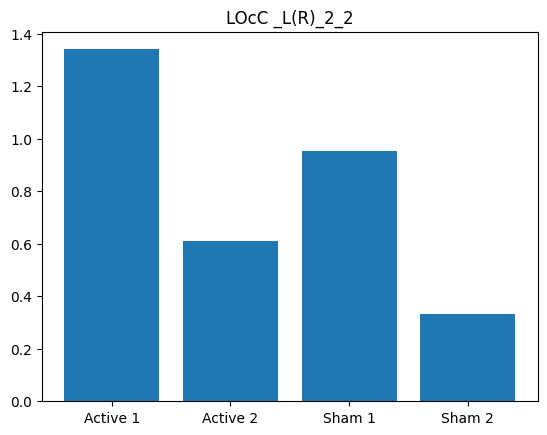

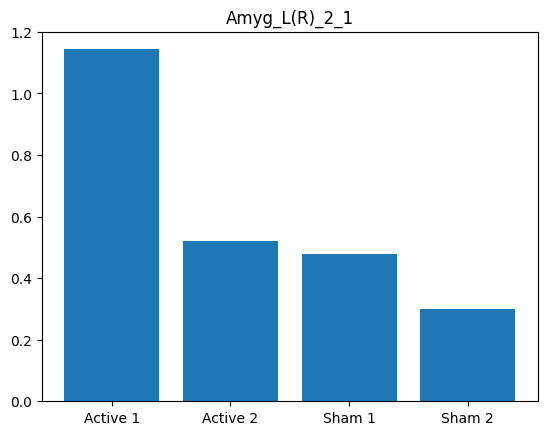

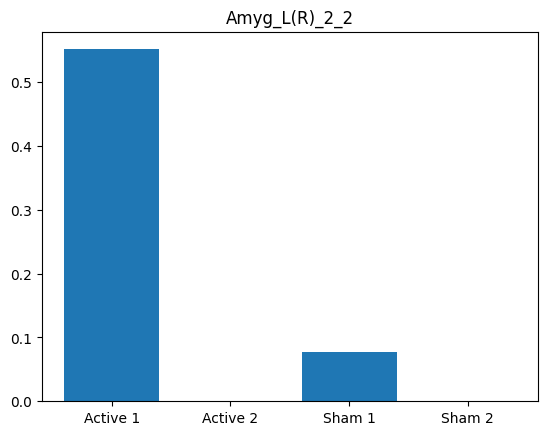

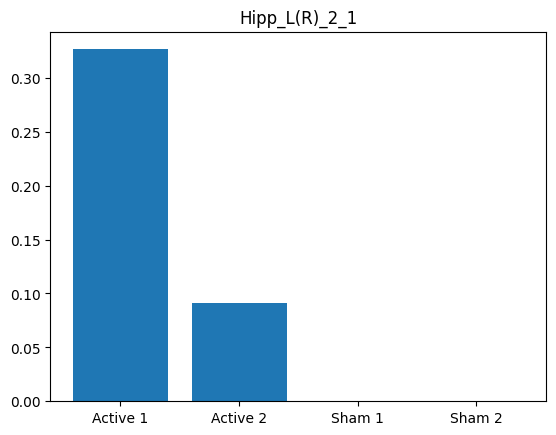

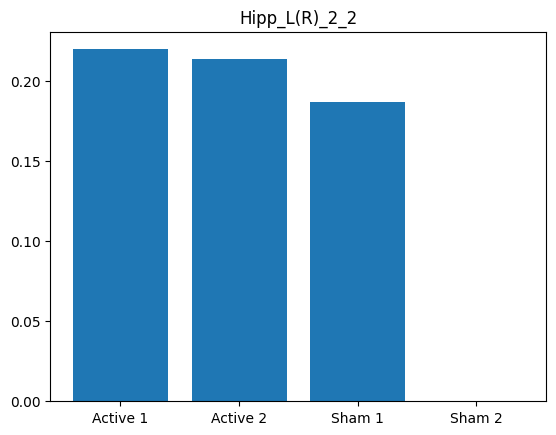

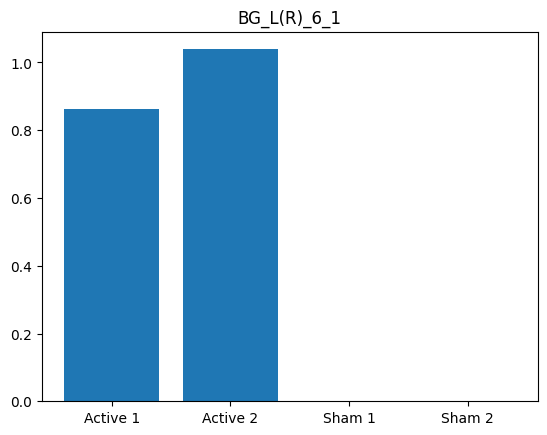

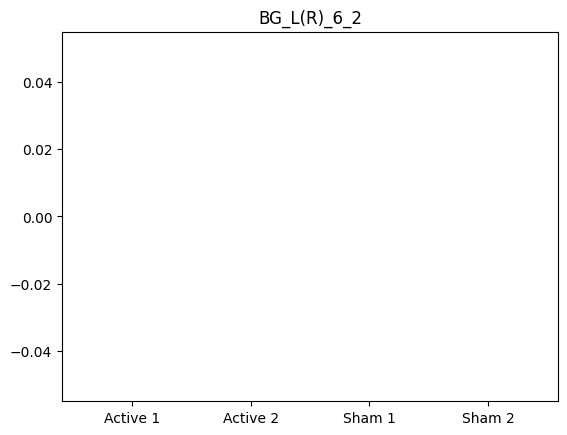

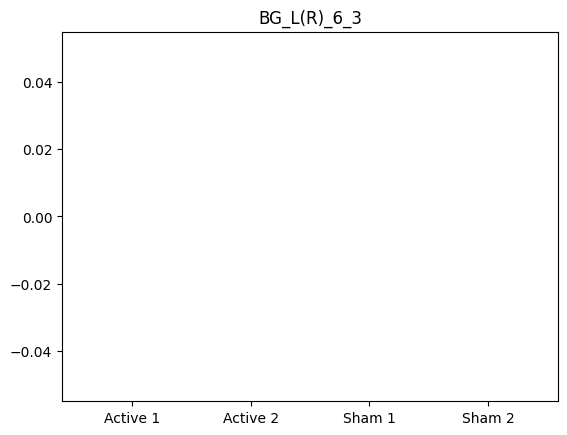

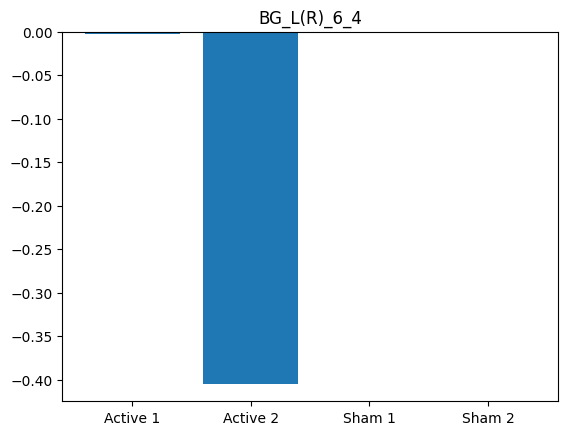

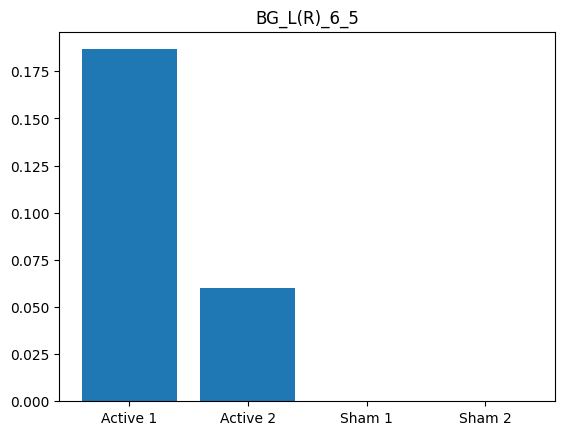

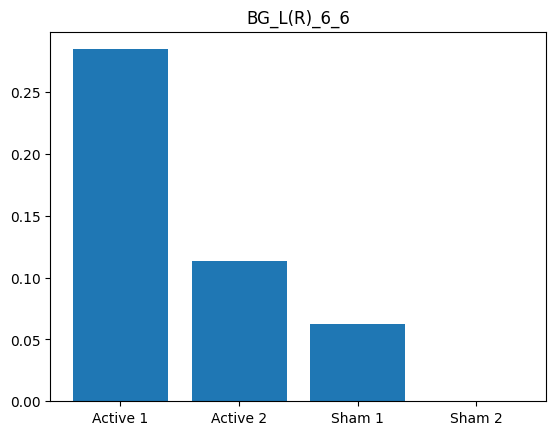

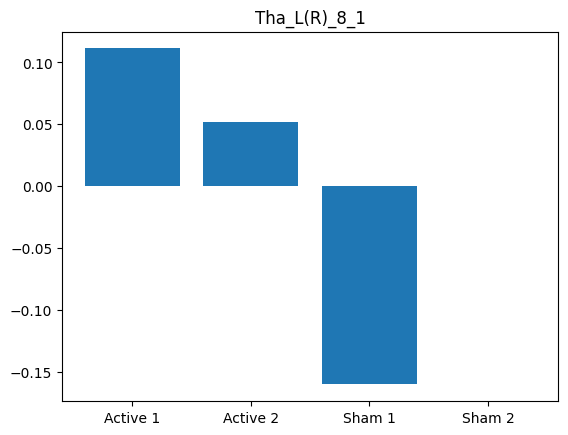

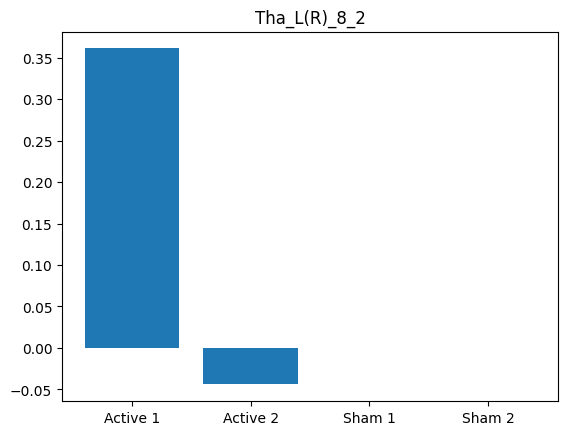

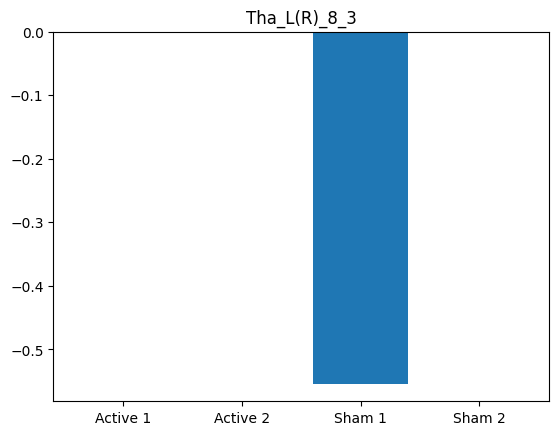

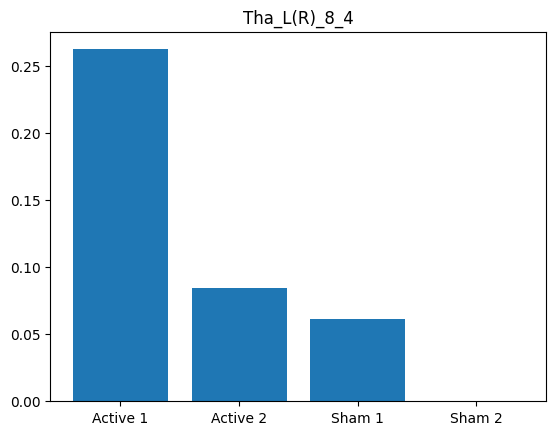

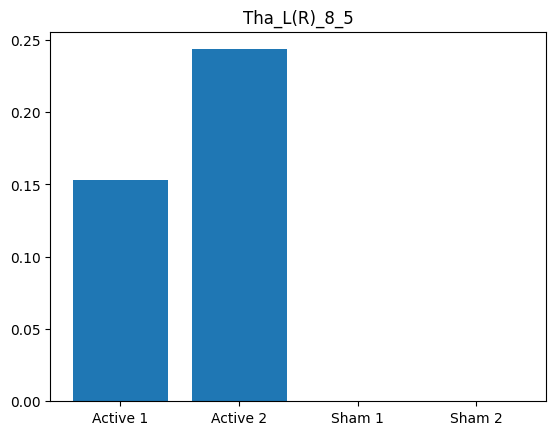

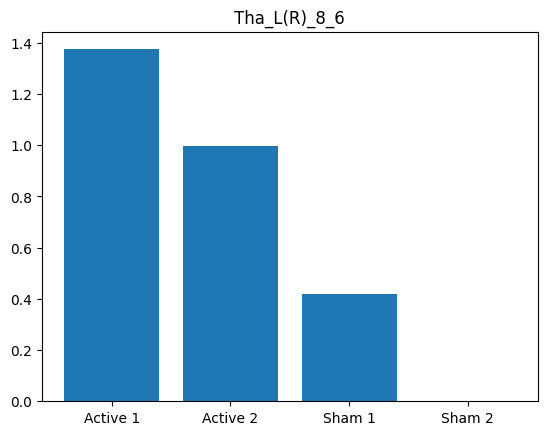

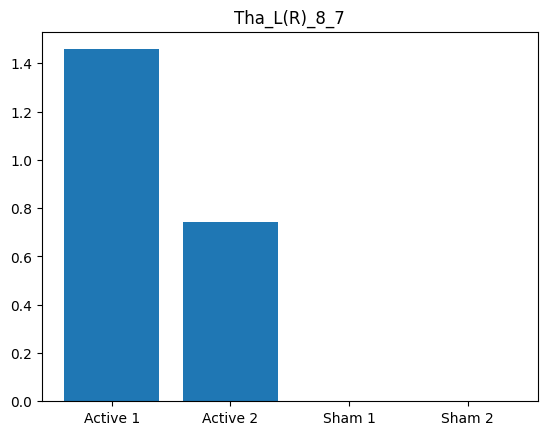

In [37]:
# for each of the rois of interest, draw a barplot with the roi_values of each group
import matplotlib.pyplot as plt

for i in r_int:
    plt.figure()
    plt.bar(['Active 1', 'Active 2', 'Sham 1', 'Sham 2'], [roi_values_active_1[0,i], roi_values_active_2[0,i], roi_values_sham_1[0,i], roi_values_sham_2[0,i]])
    plt.title(labels[i])
    plt.show()